In [1]:
from Bio.PDB import *

# parser = PDBParser()
parser = MMCIFParser()
# structure = parser.get_structure("", "data/2kdk.pdb")
structure = parser.get_structure("", "data/clock_bmal1_modelled.cif")
models = structure.get_models()

# Example usage
cif_file = 'data/clock_bmal1_modelled.cif'  # Replace with your CIF file path

protein = {}
for model in models:
    print("model")
    chains = model.get_chains()
    for chain in chains:
        chain_residues = []
        # print(chain.id)
        atoms = chain.get_atoms()
        # count = 0
        atoms_list = []
        for atom in atoms:
            if atom.name=="CA":
                atoms_list.append(atom)
                # count += 1
                ca_atom = atom
                ca_coord = atom.get_coord()
                # print(ca_atom, ca_coord)
                residue = atom.get_parent()
                # print(residue.get_resname())
                # if count==2:
                    # break
                chain_residues.append(atom)
        protein[chain.id] = chain_residues
        # print(atoms_list)
        # print(atoms_list[0]-atoms_list[1])
        # print(atoms_list[1]-atoms_list[0])

for chain in protein:
    print(len(protein[chain]))
    print(chain)
residueNames = []
x, y , z = [], [], []
for atom in protein["A"]:
    residue = atom.get_parent()
    residueNames.append(residue.get_resname())
    x.append(atom.get_coord()[0])
    y.append(atom.get_coord()[1])
    z.append(atom.get_coord()[2])
for atom in protein["B"]:
    residue = atom.get_parent()
    residueNames.append(residue.get_resname())
    x.append(atom.get_coord()[0])
    y.append(atom.get_coord()[1])
    z.append(atom.get_coord()[2])
print(len(residueNames))
print(len(x), len(y), len(z))
print(x)
print(y)
print(z)
domain = ["" for _ in range(728)]
for i in range(728):
    if i>=0 and i<=50:
        domain[i] = "bHLH"
    elif i>=76 and i<=230:
        domain[i] = "PAS_A"
    elif i>=231 and i<=353:
        domain[i] = "PAS_B"
    elif i>=354 and i<=409:
        domain[i] = "bHLH"
    elif i>=426 and i<=606:
        domain[i] = "PAS_A"
    elif i>=609 and i<=727:
        domain[i] = "PAS_B"
    else:
        domain[i] = "None"
print(domain)
chain = ["" for _ in range(728)]
for i in range(728):
    if i<354:
        chain[i] = "CLOCK"
    else:
        chain[i] = "BMAL1"
print(len(chain))
print(chain)
res = [x for x in range(728)]
print(len(res))
print(res)

distanceThreshold = 7.0
chainAEdges = []
chainA = protein['A']
for i in range(len(chainA)-1):
    for j in range(i+1, len(chainA)):
        distance = chainA[i]-chainA[j]
        if distance>0.0 and distance<=distanceThreshold:
            # print(i, j, distance)
            chainAEdges.append((i,j))
print("No. of edges in chain A graph:",len(chainAEdges))

nodeIdGap = len(protein['A'])
chainBEdges = []
chainB = protein['B']
for i in range(len(chainB)-1):
    for j in range(i+1, len(chainB)):
        distance = chainB[i]-chainB[j]
        if distance>0.0 and distance<=distanceThreshold:
            # print(i+nodeIdGap, j+nodeIdGap, distance)
            chainBEdges.append((i+nodeIdGap, j+nodeIdGap))
print("No. of edges in chain B graph:",len(chainBEdges))

chainAB = []
chainAB.extend(protein['A'])
chainAB.extend(protein['B'])
chainABEdges = []
for i in range(len(chainAB)-1):
    for j in range(i+1, len(chainAB)):
        distance = chainAB[i]-chainAB[j]
        if distance>0.0 and distance<=distanceThreshold:
            # print(i, j, distance)
            chainABEdges.append((i,j))
print("No. of edges in chain AB graph:",len(chainABEdges))
print(len(chainABEdges)-len(chainBEdges)-len(chainAEdges))

model
354
A
374
B
728
728 728 728
[158.63, 157.98, 158.36, 154.56, 154.11, 156.39, 154.48, 151.27, 152.81, 154.64, 151.32, 149.71, 152.54, 152.17, 148.39, 149.44, 151.81, 149.2, 146.44, 148.73, 149.32, 145.48, 144.83, 147.8, 146.2, 142.75, 144.27, 146.5, 143.47, 141.36, 144.48, 143.97, 146.32, 147.37, 146.81, 150.67, 151.99, 153.34, 155.46, 153.91, 155.58, 154.49, 150.93, 150.89, 152.63, 150.01, 147.4, 148.58, 149.21, 145.55, 143.88, 145.82, 144.41, 140.78, 141.45, 142.6, 139.79, 137.2, 138.8, 139.0, 135.8, 133.59, 130.2, 131.01, 127.63, 129.71, 132.25, 129.6, 128.54, 125.12, 125.03, 125.77, 127.24, 124.07, 122.2, 122.75, 123.16, 119.71, 117.95, 119.87, 118.88, 115.12, 114.81, 116.92, 115.04, 111.47, 112.27, 114.02, 111.14, 113.59, 114.73, 117.81, 118.14, 120.95, 121.2, 123.83, 124.96, 122.62, 119.59, 119.0, 117.96, 120.02, 118.53, 115.8, 114.85, 111.41, 111.02, 110.13, 106.64, 105.72, 106.93, 105.63, 103.32, 105.65, 106.93, 110.59, 109.14, 107.78, 111.22, 114.29, 115.67, 113.6, 114.82

In [150]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def localCentrality(A, p, maxIterations=1000):
    n = A.shape[0]
    l = np.ones(n) / n
    unitNormal = np.copy(l)
    angle = float(0)
    lHistory = [l.copy()]
    for _ in range(maxIterations):
        lNew = (p*(A.dot(l))) + ((1-p)*unitNormal)
        lHistory.append(lNew.copy())
        angleNew = angle_between(l, lNew)
        if (angleNew==angle) or (angleNew==0):
            break
        l, angle = lNew, angleNew
    return(l, np.array(lHistory))

def globalCentrality(A, C, l, p, maxIterations=1000):
    n = A.shape[0]
    g = np.ones(n) / n
    unitNormal = np.copy(g)
    angle = float(0)
    gHistory = [g.copy()]
    for _ in range(maxIterations):
        gNew = (p*((A+C).dot(g) + C.dot(l))) + ((1-p)*unitNormal)
        gHistory.append(gNew.copy())
        angleNew = angle_between(g, gNew)
        if (angleNew==angle) or (angleNew==0):
            break
        g, angle = gNew, angleNew
    return(g, np.array(gHistory))

# A = [[0, 1, 1], [1, 0, 0], [1, 0, 0]]
# l = localCentrality(np.array(A), 0.9)
# print(l)
# l = local_centrality(np.array(A), 1, 0.9)
# print(l)

def getAC(edges):
    adj = np.zeros(shape=(728, 728))
    for (u, v) in edges:
        adj[u, v] = 1.
        adj[v, u] = 1.
    adj = adj / np.sum(adj, axis=0)
    A, C = np.zeros(shape=(728, 728)), np.zeros(shape=(728, 728))
    for (u, v) in edges:
        if (u<354 and v<354) or (u>=354 and v>=354):
            A[u, v] = adj[u, v]
            A[v, u] = adj[v, u]
        elif (u<354 and v>=354) or (v<354 and u>=354):
            C[u, v] = adj[u, v]
            C[v, u] = adj[v, u]
    return(A, C)

In [139]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
seed = 42
random.seed(seed)
G = nx.Graph(chainABEdges)
print(G)
# Assuming G is your original multilayer graph
layer1_nodes = list(range(354))  # Nodes 0-353
layer2_nodes = list(range(354, 728))  # Nodes 354-727
layer1NodeMap = {i:layer1_nodes[i] for i in range(len(layer1_nodes))}
layer2NodeMap = {i:layer2_nodes[i] for i in range(len(layer2_nodes))}

# Step 1: Extract intra-layer degree sequences
def get_intra_layer_degrees(graph, layer_nodes):
    # Create a subgraph for the layer
    subgraph = graph.subgraph(layer_nodes)
    return [subgraph.degree(x) for x in layer_nodes]

# Step 2: Create random graphs for each layer based on the intra-layer degree distributions
def create_random_layer(degree_sequence):
    return nx.random_degree_sequence_graph(degree_sequence, seed=seed, tries=1000)

def create_random_interlayer_edges(merged_graph, layer1_nodes, layer2_nodes):
    # Get the number of interlayer edges in the original graph
    original_interlayer_edges = [(u, v) for u, v in G.edges() if (u in layer1_nodes and v in layer2_nodes) \
                                                        or (v in layer1_nodes and u in layer2_nodes)]
    num_interlayer_edges = len(original_interlayer_edges)
    print("No. of interlayer edges:", num_interlayer_edges)
    
    # Generate all possible interlayer edges
    possible_interlayer_edges = [(u, v) for u in layer1_nodes for v in layer2_nodes]
    
    # Randomly select interlayer edges from the possible ones
    selected_edges = random.sample(possible_interlayer_edges, num_interlayer_edges)
    merged_graph.add_edges_from(selected_edges)
    
    return merged_graph

# Get intra-layer degree sequences
intra_layer1_degrees = get_intra_layer_degrees(G, layer1_nodes)
intra_layer2_degrees = get_intra_layer_degrees(G, layer2_nodes)
random.shuffle(intra_layer1_degrees)
random.shuffle(intra_layer2_degrees)
# Generate random graphs for both layers
random_layer1 = create_random_layer(intra_layer1_degrees)
random_layer1 = nx.relabel_nodes(random_layer1, layer1NodeMap)
random_layer2 = create_random_layer(intra_layer2_degrees)
random_layer2 = nx.relabel_nodes(random_layer2, layer2NodeMap)
merged_random_graph = nx.Graph()
merged_random_graph.add_nodes_from(random_layer1.nodes(data=True))
merged_random_graph.add_edges_from(random_layer1.edges(data=True))
merged_random_graph.add_nodes_from(random_layer2.nodes(data=True))
merged_random_graph.add_edges_from(random_layer2.edges(data=True))
print(merged_random_graph)

# Generate new random interlayer edges based on the merged random graph
r1G = create_random_interlayer_edges(merged_random_graph, layer1_nodes, layer2_nodes)
print(r1G)
# Get intra-layer degree sequences
intra_layer1_degrees = get_intra_layer_degrees(G, layer1_nodes)
intra_layer2_degrees = get_intra_layer_degrees(G, layer2_nodes)
# Generate random graphs for both layers
random_layer1 = create_random_layer(intra_layer1_degrees)
random_layer1 = nx.relabel_nodes(random_layer1, layer1NodeMap)
random_layer2 = create_random_layer(intra_layer2_degrees)
random_layer2 = nx.relabel_nodes(random_layer2, layer2NodeMap)
merged_random_graph = nx.Graph()
merged_random_graph.add_nodes_from(random_layer1.nodes(data=True))
merged_random_graph.add_edges_from(random_layer1.edges(data=True))
merged_random_graph.add_nodes_from(random_layer2.nodes(data=True))
merged_random_graph.add_edges_from(random_layer2.edges(data=True))
print(merged_random_graph)

# Generate new random interlayer edges based on the merged random graph
r2G = create_random_interlayer_edges(merged_random_graph, layer1_nodes, layer2_nodes)
print(r2G)
print(list(G.edges())[:100])
print(list(r1G.edges())[:100])
print(list(r2G.edges())[:100])
print([G.degree(x) for x in range(728)])
print([r1G.degree(x) for x in range(728)])
print([r2G.degree(x) for x in range(728)])

Graph with 728 nodes and 2638 edges
Graph with 728 nodes and 2558 edges
No. of interlayer edges: 80
Graph with 728 nodes and 2638 edges
Graph with 728 nodes and 2558 edges
No. of interlayer edges: 80
Graph with 728 nodes and 2638 edges
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10), (7, 11), (8, 9), (8, 10), (8, 11), (8, 12), (9, 10), (9, 11), (9, 12), (9, 13), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (11, 15), (12, 13), (12, 14), (12, 15), (12, 16), (13, 14), (13, 15), (13, 16), (13, 17), (14, 15), (14, 16), (14, 17), (14, 18), (15, 16), (15, 17), (15, 18), (15, 19), (16, 17), (16, 18), (16, 19), (16, 20), (17, 18), (17, 19), (17, 20), (17, 21), (18, 19), (18, 20), (18, 21), (18, 22), (19, 20), (19, 21), (19, 22), (19, 23), (19, 397), (20, 21), (20, 22), (20, 23), 

Graph with 728 nodes and 2638 edges
Graph with 728 nodes and 2558 edges
No. of interlayer edges: 80
Graph with 728 nodes and 2638 edges
Graph with 728 nodes and 2558 edges
No. of interlayer edges: 80
Graph with 728 nodes and 2638 edges
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (6, 10), (7, 8), (7, 9), (7, 10), (7, 11), (8, 9), (8, 10), (8, 11), (8, 12), (9, 10), (9, 11), (9, 12), (9, 13), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (11, 15), (12, 13), (12, 14), (12, 15), (12, 16), (13, 14), (13, 15), (13, 16), (13, 17), (14, 15), (14, 16), (14, 17), (14, 18), (15, 16), (15, 17), (15, 18), (15, 19), (16, 17), (16, 18), (16, 19), (16, 20), (17, 18), (17, 19), (17, 20), (17, 21), (18, 19), (18, 20), (18, 21), (18, 22), (19, 20), (19, 21), (19, 22), (19, 23), (19, 397), (20, 21), (20, 22), (20, 23), 

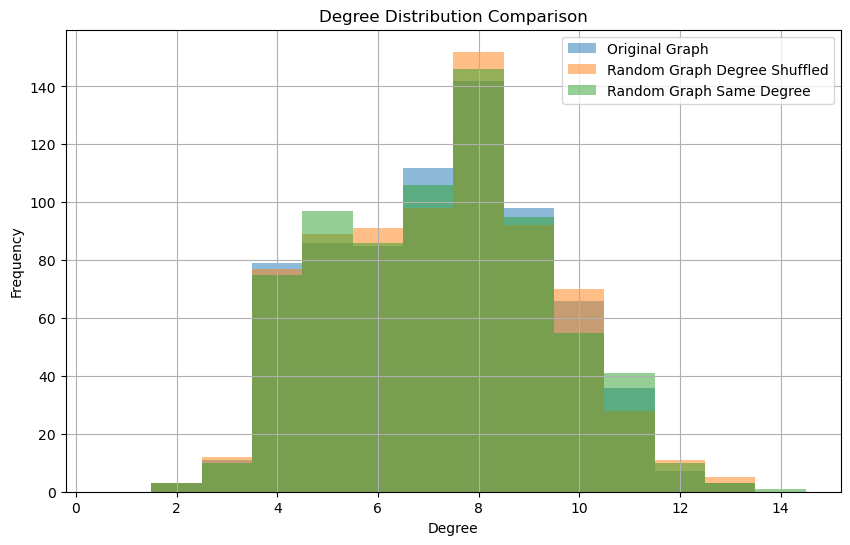

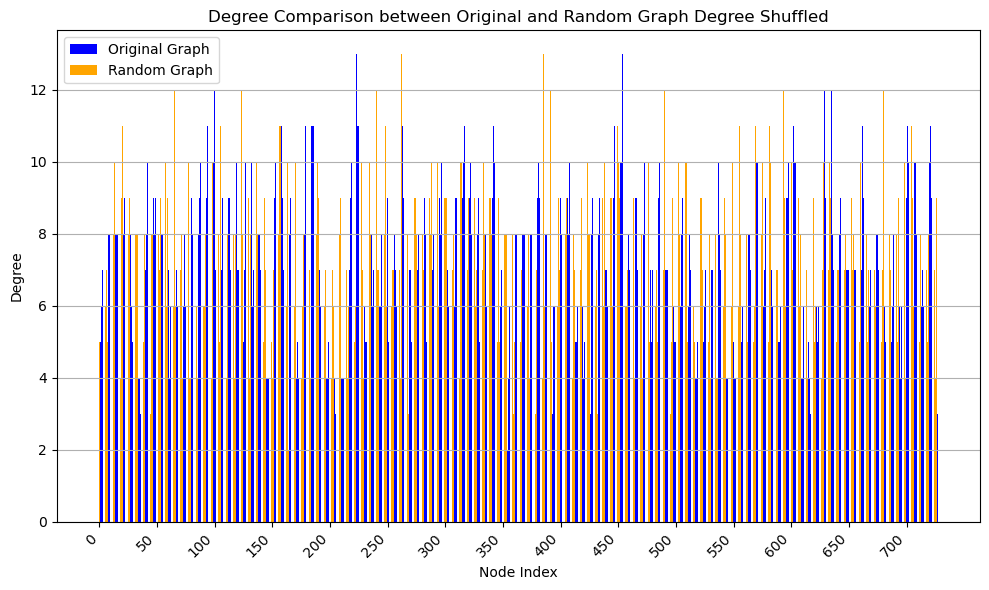

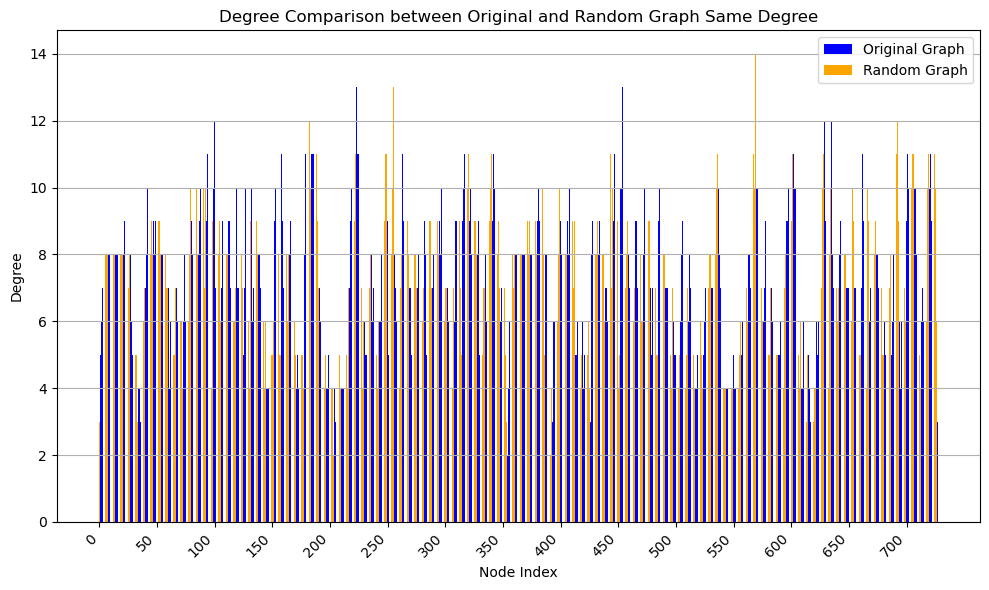

In [58]:
# Function to plot degree distribution
def plot_degree_distribution(graph, label, ax):
    degrees = [deg for node, deg in graph.degree()]
    ax.hist(degrees, bins=np.arange(0.5, max(degrees)+1.5, 1), alpha=0.5, label=label)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
# Plot degree distributions
plot_degree_distribution(G, 'Original Graph', ax)
plot_degree_distribution(r1G, 'Random Graph Degree Shuffled', ax)
plot_degree_distribution(r2G, 'Random Graph Same Degree', ax)
# Customizing the plot
ax.set_title('Degree Distribution Comparison')
ax.set_xlabel('Degree')
ax.set_ylabel('Frequency')
ax.legend()
ax.grid()
# Set the y-axis to logarithmic scale
# ax.set_yscale('log')
# Show the plot
plt.show()

def plot_degree_comparison(original_degrees, random_degrees, title):
    x = np.arange(len(original_degrees))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    # Create bars for original degrees
    bars1 = ax.bar(x - width/2, original_degrees, width, label='Original Graph', color='blue')
    
    # Create bars for random degrees
    bars2 = ax.bar(x + width/2, random_degrees, width, label='Random Graph', color='orange')

    # Customizing the plot
    ax.set_title(title)
    ax.set_xlabel('Node Index')
    ax.set_ylabel('Degree')
    # Selectively display x-axis ticks (e.g., every second tick)
    tick_indices = np.arange(0, len(original_degrees), 50)  # Select every second index
    ax.set_xticks(tick_indices)  # Set x-ticks to selected indices
    ax.set_xticklabels(tick_indices, rotation=45, ha='right')  # Rotate x-ticks for better spacing
    ax.legend()
    ax.grid(axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()

gDegree = [G.degree(x) for x in range(728)]
r1GDegree = [r1G.degree(x) for x in range(728)]
r2GDegree = [r2G.degree(x) for x in range(728)]

# Plot degree comparison
plot_degree_comparison(gDegree, r1GDegree, "Degree Comparison between Original and Random Graph Degree Shuffled")
plot_degree_comparison(gDegree, r2GDegree, "Degree Comparison between Original and Random Graph Same Degree")

0.0 1.0


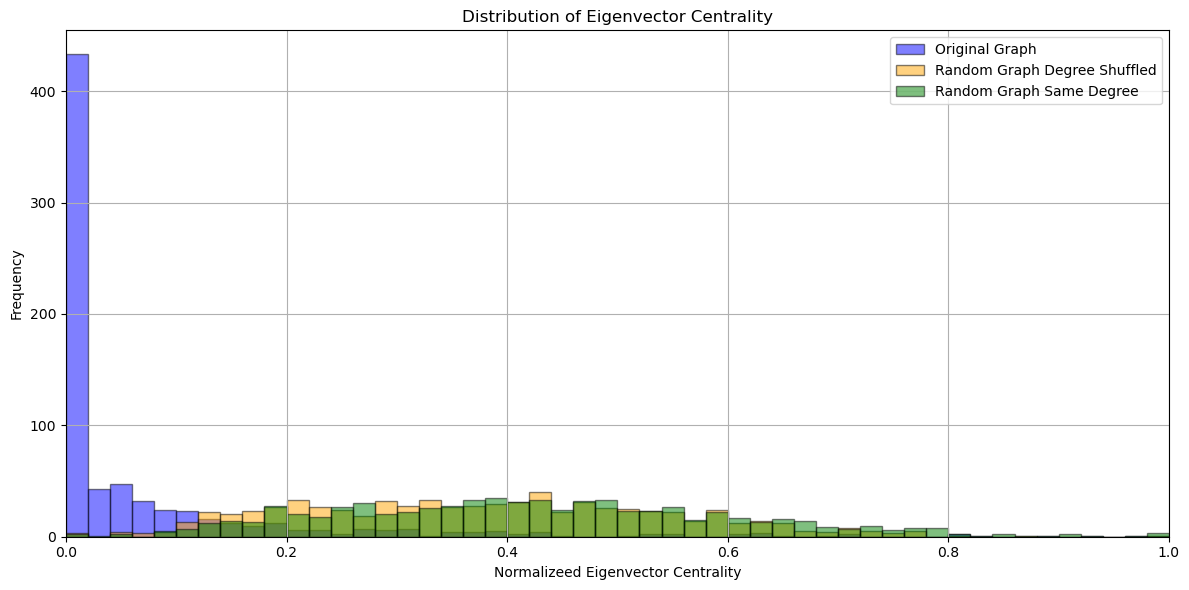

0.0 1.0


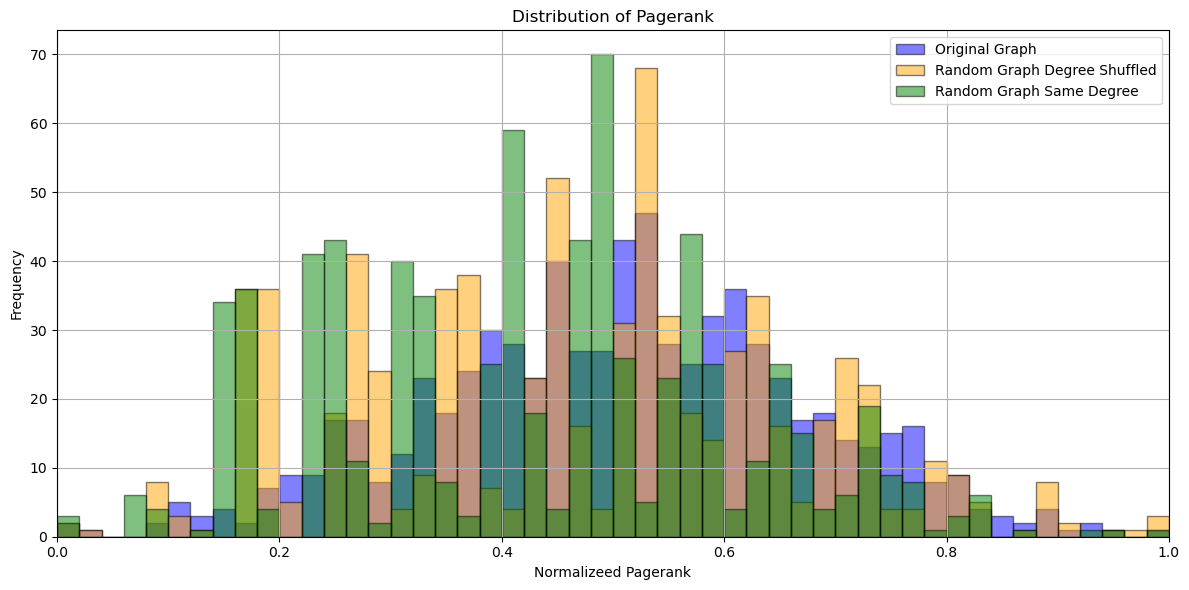

Graph with 728 nodes and 2638 edges
[0.00070432 0.0010779  0.00125738 0.00143369 0.00139751 0.00156997
 0.00154724 0.00152923 0.00151521 0.00150579 0.0014999  0.00149839
 0.00149986 0.00150404 0.00151164 0.00153237 0.00154372 0.00155659
 0.00158091 0.00191802 0.00161068 0.00162707 0.00196258 0.0018691
 0.00167702 0.00149258 0.00203974 0.00173107 0.00134414 0.00118525
 0.00142764 0.00103736 0.00135102 0.00090608 0.00117761 0.00115811
 0.0008822  0.00146202 0.00115888 0.00155665 0.00164414 0.00175591
 0.00214599 0.00202412 0.0017142  0.00169531 0.00169715 0.00200481
 0.00169092 0.00190366 0.00199589 0.0019959  0.00168026 0.00168557
 0.00169365 0.00169724 0.00170684 0.00174343 0.00155058 0.00135719
 0.00163545 0.00102711 0.00162319 0.00180769 0.00196199 0.00195993
 0.00178682 0.00195607 0.00177203 0.00178987 0.00145335 0.00147386
 0.00120055 0.00193336 0.00218921 0.00164149 0.00159334 0.00193856
 0.00281551 0.002262   0.00234626 0.00194569 0.00249201 0.00189057
 0.00224828 0.00182712 0.00

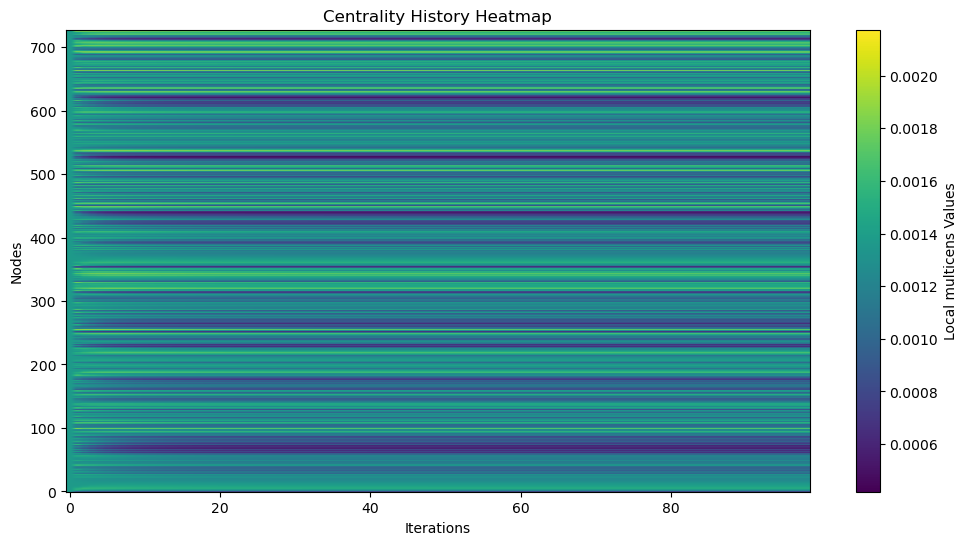

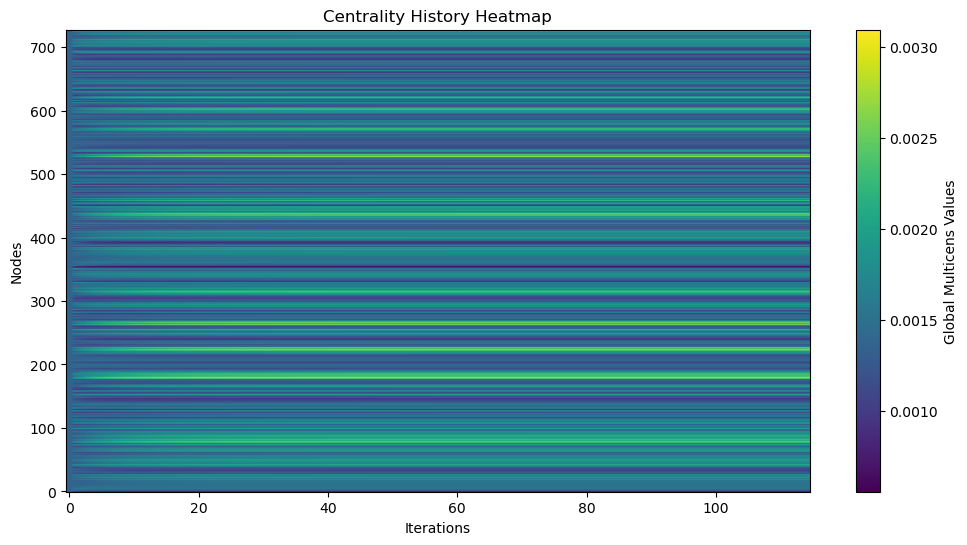

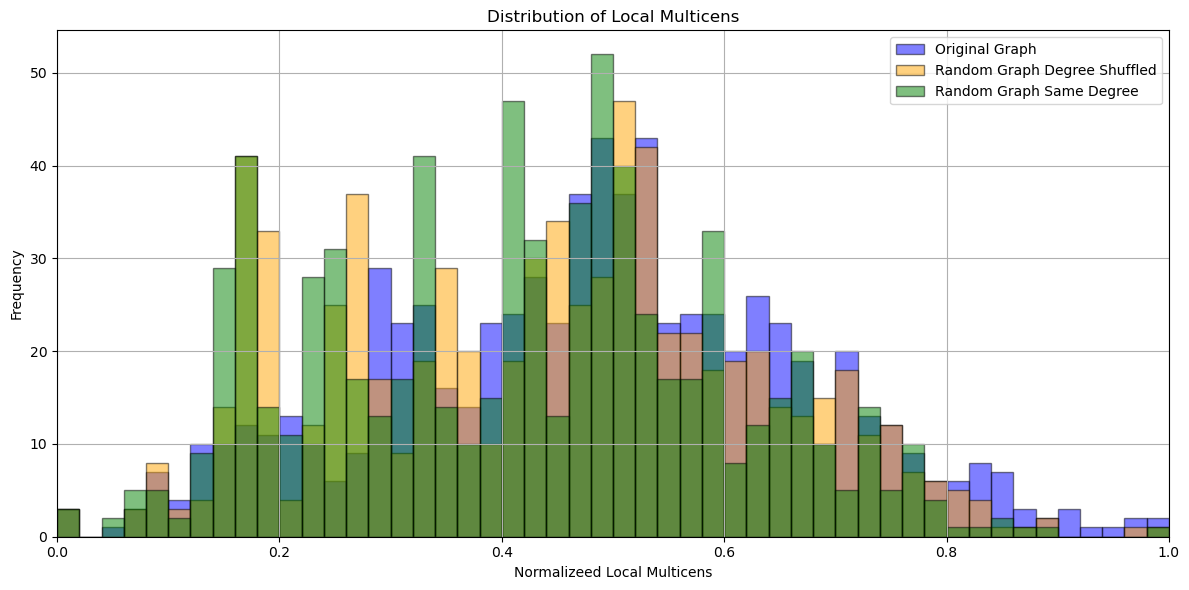

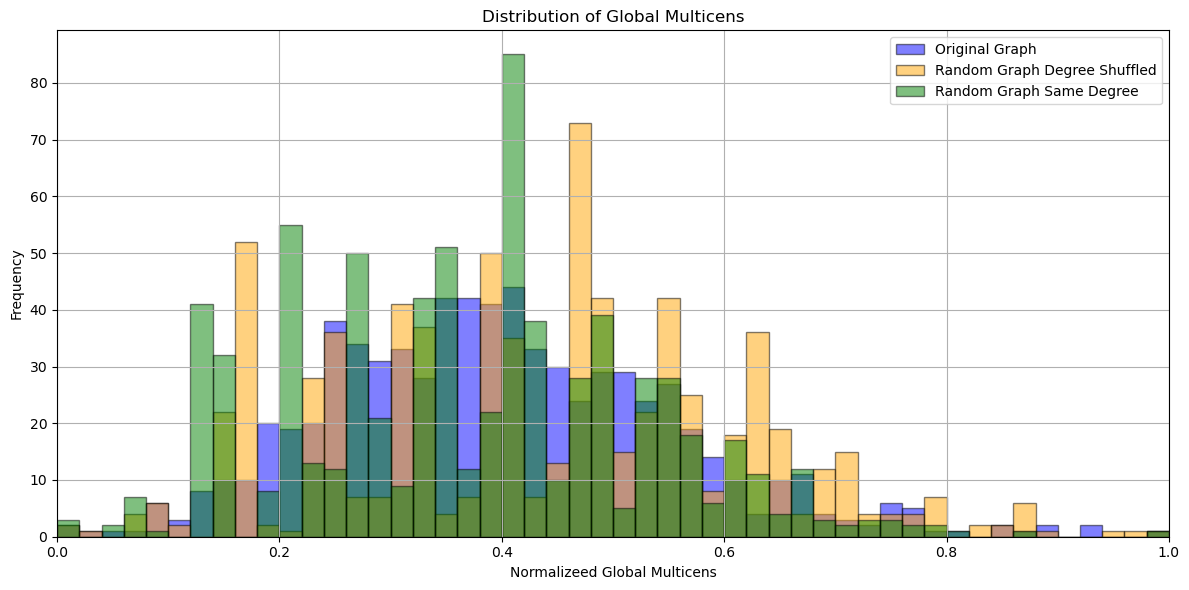

In [158]:
import seaborn as sns

# Function to plot distribution of eigenvector centrality
def plot_distribution(gEC, r1GEC, r2GEC, l1, l2, l3, t, x, y):
    plt.figure(figsize=(12, 6))

    # Plot the original graph's eigenvector centrality distribution
    plt.hist(gEC, color='blue', bins=50, label=l1, fill=True, alpha=0.5, edgecolor='black')
    
    # Plot the random graph's eigenvector centrality distribution
    plt.hist(r1GEC, color='orange', bins=50, label=l2, fill=True, alpha=0.5, edgecolor='black')
    plt.hist(r2GEC, color='green', bins=50, label=l3, fill=True, alpha=0.5, edgecolor='black')

    # Customizing the plot
    plt.title(t)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.grid()
    plt.xlim(0, 1)

    # Show the plot
    plt.tight_layout()
    plt.show()

gEC = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6)
gECVals = np.array([gEC[x] for x in range(728)])
gECValsScaled = (gECVals - gECVals.min()) / (gECVals.max() - gECVals.min())
print(min(gECValsScaled),max(gECValsScaled))
r1GEC = nx.eigenvector_centrality(r1G, max_iter=1000, tol=1e-6)
r1GECVals = np.array([r1GEC[x] for x in range(728)])
r1GECValsScaled = (r1GECVals - r1GECVals.min()) / (r1GECVals.max() - r1GECVals.min())
r2GEC = nx.eigenvector_centrality(r2G, max_iter=1000, tol=1e-6)
r2GECVals = np.array([r2GEC[x] for x in range(728)])
r2GECValsScaled = (r2GECVals - r2GECVals.min()) / (r2GECVals.max() - r2GECVals.min())
plot_distribution(gECValsScaled, r1GECValsScaled, r2GECValsScaled, "Original Graph", "Random Graph Degree Shuffled", \
                  "Random Graph Same Degree", "Distribution of Eigenvector Centrality", "Normalizeed Eigenvector Centrality", "Frequency")

gP = nx.pagerank(G)
gPVals = np.array([gP[x] for x in range(728)])
gPValsScaled = (gPVals - gPVals.min()) / (gPVals.max() - gPVals.min())
print(min(gPValsScaled),max(gPValsScaled))
r1GP = nx.pagerank(r1G)
r1GPVals = np.array([r1GP[x] for x in range(728)])
r1GPValsScaled = (r1GPVals - r1GPVals.min()) / (r1GPVals.max() - r1GPVals.min())
r2GP = nx.pagerank(r2G)
r2GPVals = np.array([r2GP[x] for x in range(728)])
r2GPValsScaled = (r2GPVals - r2GPVals.min()) / (r2GPVals.max() - r2GPVals.min())
plot_distribution(gPValsScaled, r1GPValsScaled, r2GPValsScaled, "Original Graph", "Random Graph Degree Shuffled", \
                  "Random Graph Same Degree", "Distribution of Pagerank", "Normalizeed Pagerank", "Frequency")

gEdges = list(G.edges())
A, C = getAC(gEdges)
gL, lHistory = localCentrality(A, 0.9)
gLScaled = (gL - gL.min()) / (gL.max() - gL.min())
gM, gHistory = globalCentrality(A, C, gL, 0.9)
print(G)
print(gM)
gMScaled = (gM - gM.min()) / (gM.max() - gM.min())

plt.figure(figsize=(12, 6))
plt.imshow(lHistory.T, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Local multicens Values')
plt.xlabel('Iterations')
plt.ylabel('Nodes')
plt.title('Centrality History Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(gHistory.T, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Global Multicens Values')
plt.xlabel('Iterations')
plt.ylabel('Nodes')
plt.title('Centrality History Heatmap')
plt.show()


r1GEdges = list(r1G.edges())
A, C = getAC(r1GEdges)
r1GL, sec  = localCentrality(A, 0.9)
r1GLScaled = (r1GL - r1GL.min()) / (r1GL.max() - r1GL.min())
r1GM, sec = globalCentrality(A, C, r1GL, 0.9)
r1GMScaled = (r1GM - r1GM.min()) / (r1GM.max() - r1GM.min())
r2GEdges = list(r2G.edges())
A, C = getAC(r2GEdges)
r2GL, sec = localCentrality(A, 0.9)
r2GLScaled = (r2GL - r2GL.min()) / (r2GL.max() - r2GL.min())
r2GM, sec = globalCentrality(A, C, r2GL, 0.9)
r2GMScaled = (r2GM - r2GM.min()) / (r2GM.max() - r2GM.min())
plot_distribution(gLScaled, r1GLScaled, r2GLScaled, "Original Graph", "Random Graph Degree Shuffled", \
                  "Random Graph Same Degree", "Distribution of Local Multicens", "Normalizeed Local Multicens", "Frequency")
plot_distribution(gMScaled, r1GMScaled, r2GMScaled, "Original Graph", "Random Graph Degree Shuffled", \
                  "Random Graph Same Degree", "Distribution of Global Multicens", "Normalizeed Global Multicens", "Frequency")

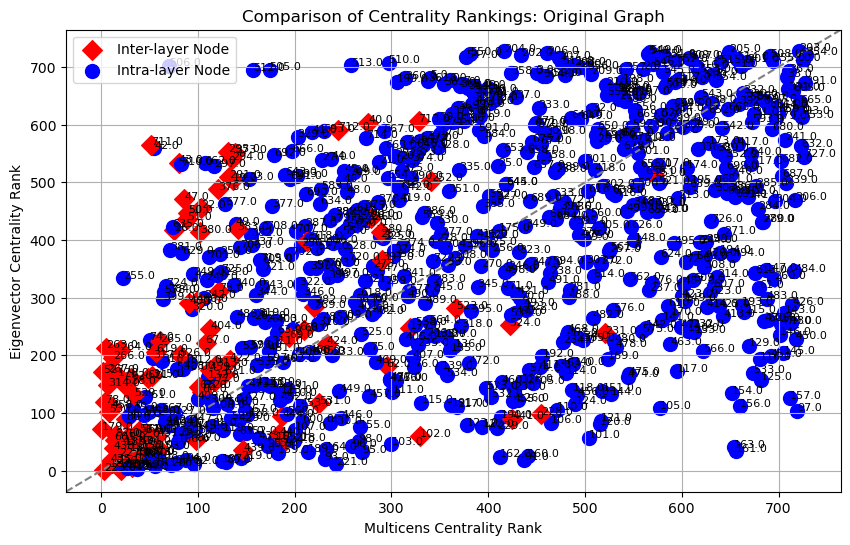

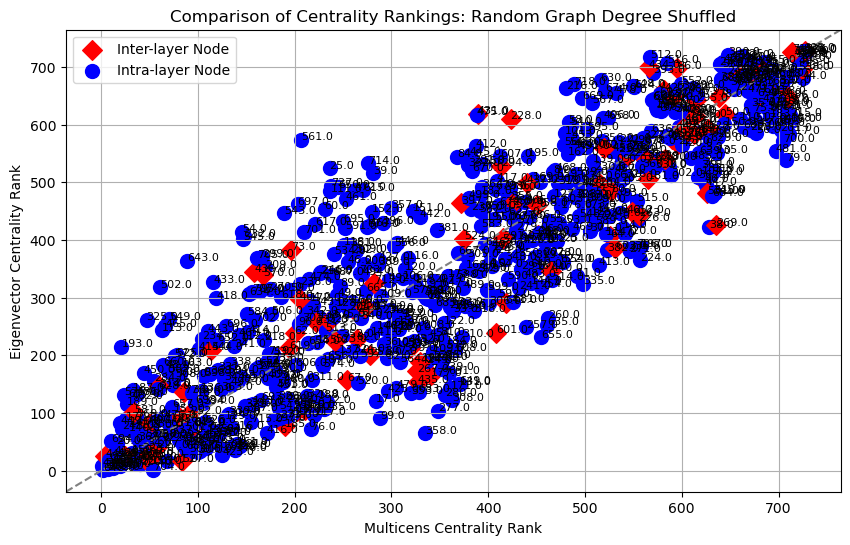

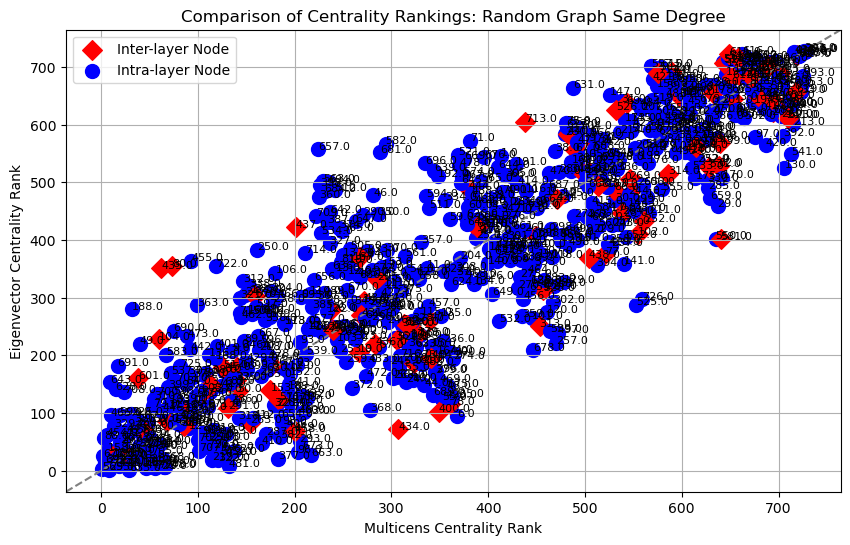

In [154]:
import pandas as pd

def compareRankings(inter_layer_node_ids, centrality_df, s):
    # Plot the rankings
    plt.figure(figsize=(10, 6))
    
    # Differentiate markers for inter-layer nodes
    for i, row in centrality_df.iterrows():
        if row['Node'] in inter_layer_node_ids:
            plt.scatter(row['Multicens Rank'], row['Eigenvector Rank'], s=100, color='red', marker='D')
        else:
            plt.scatter(row['Multicens Rank'], row['Eigenvector Rank'], s=100, color='blue', marker='o')
        # Create custom legend entries
    plt.scatter([], [], s=100, color='red', marker='D', label='Inter-layer Node')
    plt.scatter([], [], s=100, color='blue', marker='o', label='Intra-layer Node')
    plt.title('Comparison of Centrality Rankings:'+s)
    plt.xlabel('Multicens Centrality Rank')
    plt.ylabel('Eigenvector Centrality Rank')
    
    # Annotate points for better clarity
    for i, row in centrality_df.iterrows():
        plt.annotate(row['Node'], (row['Multicens Rank'], row['Eigenvector Rank']), fontsize=8)
    
    plt.axline((0, 0), slope=1, color='grey', linestyle='--')  # Diagonal line for reference
    plt.grid()
    plt.legend()
    plt.show()

# Convert centrality measures to DataFrame for ranking
centrality_df = pd.DataFrame({
    'Node': [x for x in range(728)],
    'Multicens': gMScaled,
    'Eigenvector': gECValsScaled
})
# Rank the nodes based on centrality measures (no sorting)
centrality_df['Multicens Rank'] = centrality_df['Multicens'].rank(ascending=False)
centrality_df['Eigenvector Rank'] = centrality_df['Eigenvector'].rank(ascending=False)
interLayerNodes = []
for u, v in gEdges:
    if (u<354 and v>=354) or (v<354 and u>=354):
        interLayerNodes.append(u)
        interLayerNodes.append(v)
compareRankings(interLayerNodes, centrality_df, " Original Graph")

centrality_df = pd.DataFrame({
    'Node': [x for x in range(728)],
    'Multicens': r1GMScaled,
    'Eigenvector': r1GECValsScaled
})
# Rank the nodes based on centrality measures (no sorting)
centrality_df['Multicens Rank'] = centrality_df['Multicens'].rank(ascending=False)
centrality_df['Eigenvector Rank'] = centrality_df['Eigenvector'].rank(ascending=False)
interLayerNodes = []
for u, v in gEdges:
    if (u<354 and v>=354) or (v<354 and u>=354):
        interLayerNodes.append(u)
        interLayerNodes.append(v)
compareRankings(interLayerNodes, centrality_df, " Random Graph Degree Shuffled")

centrality_df = pd.DataFrame({
    'Node': [x for x in range(728)],
    'Multicens': r2GMScaled,
    'Eigenvector': r2GECValsScaled
})
# Rank the nodes based on centrality measures (no sorting)
centrality_df['Multicens Rank'] = centrality_df['Multicens'].rank(ascending=False)
centrality_df['Eigenvector Rank'] = centrality_df['Eigenvector'].rank(ascending=False)
interLayerNodes = []
for u, v in gEdges:
    if (u<354 and v>=354) or (v<354 and u>=354):
        interLayerNodes.append(u)
        interLayerNodes.append(v)
compareRankings(interLayerNodes, centrality_df, " Random Graph Same Degree")
